In [1]:
import pandas
import calendar
from numpy import nan
from matplotlib import pyplot

In [3]:
charts = pandas.DataFrame(columns = ['date', 'rank', 'title', 'artist', 'album'])

for year in range(2017, 2021):
    for month in range(11, 13, 1):
        days = calendar.monthrange(year, month)[1] + 1
        for day in range(1, days, 1):
            filename = fr'bugs\bugs_chart_{year}.{month:02}.xls'
            sh_name = f'{year:04}{month:02}{day:02}'
            df = pandas.read_excel(filename, sheet_name = sh_name)
            date = f'{year:04}-{month:02}-{day:02}'
            df['date'] = date
            charts = pandas.concat([charts, df], axis = 0)
charts['date'] = pandas.to_datetime(charts['date'])
charts.set_index('date', inplace = True)
charts

,rank,title,artist,album
date,,,,
2017-11-01,1,나의 밤 나의 너,성시경,나의 밤 나의 너
2017-11-01,2,LIKEY,TWICE (트와이스),twicetagram
2017-11-01,3,연애소설 (Feat. 아이유),에픽하이 (EPIK HIGH),WE'VE DONE SOMETHING WONDERFUL
2017-11-01,4,선물,멜로망스(MeloMance),Moonlight
2017-11-01,5,그리워하다,비투비,Brother Act.
...,...,...,...,...
2020-12-31,96,Ice Cream (with Selena Gomez),BLACKPINK,Ice Cream (with Selena Gomez)
2020-12-31,97,METEOR,창모(CHANGMO),Boyhood
2020-12-31,98,뚜두뚜두 (DDU-DU DDU-DU),BLACKPINK,SQUARE UP


In [4]:
charts = pandas.DataFrame(columns = ['year', 'date', 'rank', 'title', 'artist', 'album'])

for year in range(2014, 2021, 1):
    for month in range(11, 13, 1):
        days = calendar.monthrange(year, month)[1] + 1
        for day in range(1, days, 1):
            filename = f'bugs_chart_{year}.{month:02}.xls'
            sh_name = f'{year:04}{month:02}{day:02}'
            date = f'{month:02}-{day:02}'
            df = pandas.read_excel(filename, sheet_name = sh_name)
            df.insert(0, 'year', year)
            df.insert(1, 'date', date)
            charts = pandas.concat([charts, df], axis = 0)
charts

FileNotFoundError: [Errno 2] No such file or directory: 'bugs_chart_2014.11.xls'

In [75]:
ndf1 = pandas.DataFrame(columns = ['year', 'date', 'rank'])

for year in range(2014, 2021):
    for month in range(11, 13, 1):
        days = calendar.monthrange(year, month)[1] + 1
        for day in range(1, days, 1):
            date = f'{month:02}-{day:02}'
            ndf1 = ndf1.append([{'year':year, 'date':date, 'rank':nan}])
ndf1

,year,date,rank
0,2014,11-01,NaN
0,2014,11-02,NaN
0,2014,11-03,NaN
0,2014,11-04,NaN
0,2014,11-05,NaN
...,...,...,...
0,2020,12-27,NaN
0,2020,12-28,NaN
0,2020,12-29,NaN
0,2020,12-30,NaN


In [76]:
mask = charts['title'] == 'All I Want for Christmas Is You'
ndf2 = charts[mask]
ndf2 = ndf2[['year', 'date', 'rank']]
ndf2

,year,date,rank
50,2014,12-13,51
65,2014,12-14,66
60,2014,12-15,61
51,2014,12-16,52
54,2014,12-17,55
...,...,...,...
23,2020,12-27,24
29,2020,12-28,30
54,2020,12-29,55
51,2020,12-30,52


In [77]:
ndf = pandas.concat([ndf2, ndf1], axis = 0)
ndf = ndf.drop_duplicates(subset = ['year', 'date'])
ndf

,year,date,rank
50,2014,12-13,51
65,2014,12-14,66
60,2014,12-15,61
51,2014,12-16,52
54,2014,12-17,55
...,...,...,...
0,2020,11-22,NaN
0,2020,11-23,NaN
0,2020,11-24,NaN
0,2020,11-25,NaN


In [78]:
ndf = ndf.set_index(['year', 'date'])
ndf = ndf.sort_index(axis = 0, ascending = True)
ndf

rank
year date      
2014 11-01  NaN
     11-02  NaN
     11-03  NaN
     11-04  NaN
     11-05  NaN
...         ...
2020 12-27   24
     12-28   30
     12-29   55
     12-30   52
     12-31   55

[427 rows x 1 columns]

<ipython-input-118-8e51f0208b85>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = figure.add_subplot(1, 1, 1)


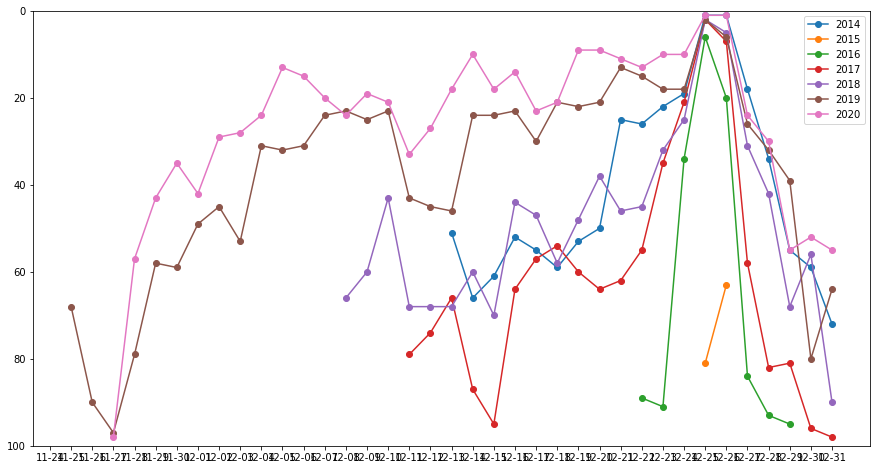

In [118]:
idx = ndf.loc[2014].index.values

figure = pyplot.figure(figsize = (15, 8))
pyplot.ylim(100, 0)
ax = figure.add_subplot(1, 1, 1)
for year in range(2014, 2021, 1):
    ax.plot(ndf.loc[year], marker = 'o', label = year)
pyplot.legend(loc = 'upper right')
pyplot.show()